<a href="https://colab.research.google.com/github/calliopz/MachineLearning/blob/master/DeepLearning_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [0]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

## Carregando o dataset

In [0]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino),(imagens_teste, identificacoes_teste)) = dataset.load_data()


## Exploração dos dados

In [0]:
len(imagens_treino)
imagens_treino.shape
imagens_teste.shape
len(identificacoes_teste)
identificacoes_treino.min()
identificacoes_treino.max()

9

## Exibição dos dados

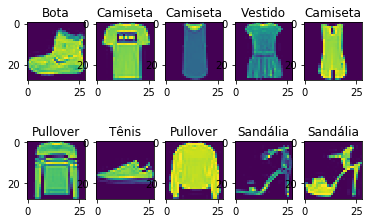

In [0]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 'Vestido', 'Casaco',
                   'Sandália', 'Camisa', 'Tênis', 'Bolsa', 'Bota']


plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])

for imagem in range(10):
  plt.subplot(2, 5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])

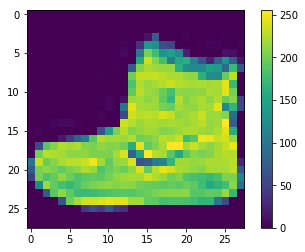

In [0]:
plt.imshow(imagens_treino[0])
plt.colorbar()

# Deep Learning

### No modelo de Deep Learning teremos 3 camadas:

1.   **Camada de Entrada:** onde os padrões são apresentados à rede 
           - Serão as imagens
            
2.   **Camadas Intermediárias ou Escondidas**: onde é feita a maior parte do processamento, através das conexões ponderadas; podem ser consideradas como extratoras de características
             - Serão as funções
             () - indica que é uma função
             
3.   **Camada de Saída**: onde o resultado final é concluído e apresentado  
      
      

## Normalizando as imagens

In [0]:
imagens_treino = imagens_treino/float(255)

## Criando, compilando, treinando e normalizando o modelo

### Criação e Normalização do Modelo

Normalização - DropOut

In [0]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

adam = keras.optimizers.Adam(lr=0.002)

callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss'),
            keras.callbacks.ModelCheckpoint(filepath='melhor_modelo.hdf5', 
                                           monitor='val_loss', save_best_only=True)]

modelo.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino,
                       batch_size = 480,
                       epochs=5, 
                       validation_split=0.2,
                       callbacks=callbacks)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 2s 48us/sample - loss: 0.6596 - acc: 0.7696 - val_loss: 0.4620 - val_acc: 0.8396
Epoch 2/5
48000/48000 [==============================] - 2s 34us/sample - loss: 0.4400 - acc: 0.8445 - val_loss: 0.4109 - val_acc: 0.8549
Epoch 3/5
48000/48000 [==============================] - 2s 34us/sample - loss: 0.3912 - acc: 0.8618 - val_loss: 0.3747 - val_acc: 0.8689
Epoch 4/5
48000/48000 [==============================] - 2s 34us/sample - loss: 0.3659 - acc: 0.8694 - val_loss: 0.3563 - val_acc: 0.8723
Epoch 5/5
48000/48000 [==============================] - 2s 33us/sample - loss: 0.3421 - acc: 0.8768 - val_loss: 0.3402 - val_acc: 0.8792


### Sumário do modelo

In [0]:
sumario_do_modelo = modelo.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


### Pesos da primeira camada Dense

In [0]:
pesos_camada_dense = modelo.layers[1].get_weights()[0]
pesos_camada_dense

array([[-0.07299224, -0.02055172, -0.03348788, ...,  0.02346489,
         0.06839287,  0.11190506],
       [-0.06061227, -0.01398017, -0.0046799 , ..., -0.06791432,
         0.02522876, -0.03982304],
       [-0.09617747, -0.05149367,  0.06944472, ..., -0.03479271,
         0.18147394, -0.11741813],
       ...,
       [-0.07817719,  0.18394342, -0.11447566, ..., -0.01114357,
        -0.06076337,  0.06045923],
       [-0.03268114,  0.22142875, -0.03043538, ..., -0.0345059 ,
        -0.01085014, -0.00682327],
       [-0.01739241,  0.07876338, -0.01616094, ..., -0.05934842,
        -0.0187154 , -0.02716124]], dtype=float32)

In [0]:
pesos_camada_dense.shape
#mostra numero de linhas, seguido do número de elementos

(784, 256)

In [0]:
pesos_camada_dense.shape
pesos_camada_dense_zerados = np.zeros((784, 256))

pesos_camada_dense_aleatorios = np.random.rand(784, 256)


#modelo.layers[1].set_weights([pesos_camada_dense_zerados, vieses_camada_dense])

modelo.layers[1].set_weights([pesos_camada_dense_aleatorios, vieses_camada_dense])

modelo.layers[1].get_weights()

[array([[0.2347711 , 0.64143646, 0.04413169, ..., 0.918212  , 0.50316244,
         0.502623  ],
        [0.81814235, 0.24025305, 0.3304214 , ..., 0.39287966, 0.7005632 ,
         0.78276926],
        [0.2676502 , 0.43662083, 0.6675282 , ..., 0.3920025 , 0.5497865 ,
         0.7788436 ],
        ...,
        [0.65159523, 0.77412766, 0.7003969 , ..., 0.13338284, 0.1890187 ,
         0.38347983],
        [0.04389043, 0.6895431 , 0.32569167, ..., 0.5194108 , 0.83838344,
         0.8670456 ],
        [0.21481617, 0.06644844, 0.718511  , ..., 0.04551004, 0.9012312 ,
         0.2580796 ]], dtype=float32),
 array([ 3.50081801e-01, -4.04508337e-02, -1.10695988e-01, -3.43704596e-02,
         2.45229959e-01,  2.53646880e-01, -1.34448288e-02,  4.87293124e-01,
         3.02476496e-01,  2.20536277e-01,  1.06673680e-01,  2.38069311e-01,
        -1.51396334e-01, -1.90900087e-01, -1.42577738e-01,  2.10444212e-01,
         2.16236368e-01, -6.39262646e-02,  1.34701431e-01, -3.35014641e-01,
         4.800

In [0]:
modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy', 
               metrics=['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 5s 97us/sample - loss: 86.5432 - acc: 0.4169 - val_loss: 19.9156 - val_acc: 0.6963
Epoch 2/5
48000/48000 [==============================] - 4s 93us/sample - loss: 23.1153 - acc: 0.6296 - val_loss: 9.5772 - val_acc: 0.7092
Epoch 3/5
48000/48000 [==============================] - 4s 93us/sample - loss: 10.5997 - acc: 0.6817 - val_loss: 5.0168 - val_acc: 0.7452
Epoch 4/5
48000/48000 [==============================] - 5s 95us/sample - loss: 5.3718 - acc: 0.7124 - val_loss: 2.7204 - val_acc: 0.7883
Epoch 5/5
48000/48000 [==============================] - 4s 94us/sample - loss: 2.8841 - acc: 0.7440 - val_loss: 1.7150 - val_acc: 0.7806


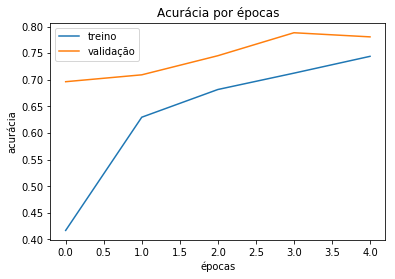

In [0]:
plt.plot(historico.history['acc'])
plt.plot(historico.history['val_acc'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])


In [0]:
modelo.get_config()

{'layers': [{'class_name': 'Flatten',
   'config': {'batch_input_shape': (None, 28, 28),
    'data_format': 'channels_last',
    'dtype': 'float32',
    'name': 'flatten_1',
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros',
     'config': {'dtype': 'float32'}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'dtype': 'float32', 'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_2',
    'trainable': True,
    'units': 256,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout_1',
    'noise_shape': None,
    'rate': 0.2,
    'seed': None,
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'softmax',
    'activity_regularizer': None,
    

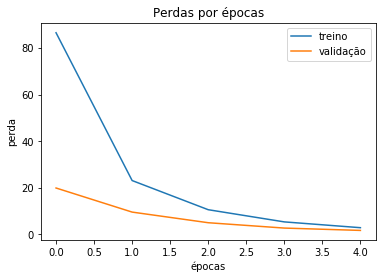

In [0]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perdas por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

In [0]:
vieses_camada_dense = modelo.layers[1].get_weights()[1]
vieses_camada_dense

array([ 0.43012276,  0.03566056, -1.3623128 , -0.92393714, -0.9464523 ,
       -0.4015763 ,  0.36573032,  0.04494833, -0.16207656, -1.0782236 ,
        0.4069198 ,  0.08653071, -1.097917  , -1.2559747 , -0.8397054 ,
       -1.1041634 , -0.6140821 , -1.0316614 ,  0.30863354, -0.50981945,
        0.45718786, -1.0443997 ,  0.42217958,  0.43486583,  0.23899426,
        0.03013125, -0.3769633 , -0.21082413, -0.25772765,  0.53970987,
       -1.0532879 ,  0.43461108, -1.1629512 ,  0.26596576,  0.50311124,
       -1.1768168 , -0.1554541 ,  0.49223432, -1.0795833 ,  0.0516555 ,
       -1.0609605 , -1.1603165 , -0.50051314, -0.37827185, -0.68974113,
       -0.39631018, -0.44475964,  0.02855678,  0.46791112, -0.44169465,
       -0.04605228, -0.59822077,  0.55229044,  0.4560952 , -0.47224486,
        0.10051578,  0.22894718, -1.1225    , -1.0965716 , -1.3550442 ,
       -0.8738969 , -0.71128154, -1.080868  ,  0.4290157 , -0.7925317 ,
        0.50627375, -0.7494563 , -0.05904118,  0.5933696 , -0.77

In [0]:
vieses_camada_dense_zerados = np.zeros((256,))

In [0]:
vieses_camada_dense_zerados = np.zeros((256,))
modelo.layers[1].set_weights(
  [pesos_camada_dense_aleatorios, vieses_camada_dense_zerados])

## Salvando e carregando o modelo treinado

In [0]:
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

## Visualizando as acurácias de treino e validação por época

In [0]:
historico.history['acc']


[0.416875, 0.62960416, 0.6816667, 0.71239585, 0.744]

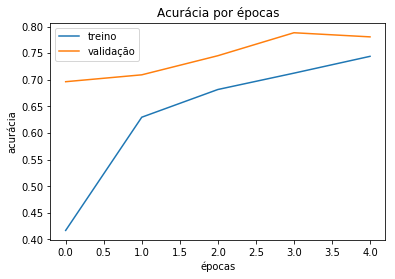

In [0]:
plt.plot(historico.history['acc'])
plt.plot(historico.history['val_acc'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])


## Visualizando as perdas de treino e validação por época

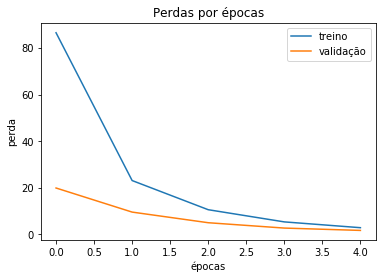

In [0]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perdas por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

## Testando o Modelo e o Modelo Salvo

In [0]:
testes = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[1]))
print('número da imagem de teste:', identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste modelo salvo:', np.argmax(testes_modelo_salvo[1]))
print('número da imagem de teste:', identificacoes_teste[1])

resultado teste: 8
número da imagem de teste: 2
resultado teste modelo salvo: 8
número da imagem de teste: 2


## Avaliando o Modelo

In [0]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

10000/10000 [==============================] - 0s 39us/sample - loss: 34556.6416 - acc: 0.1000
Perda do teste: 34556.64156875
Acurácia do teste: 0.1
